<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/lectures/visualization/vis_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización: Estática

## Introducción

### Acerca de Matplotlib 


<img src="https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png" alt="" width="400" align="center"/>

[Matplotlib](https://matplotlib.org/) es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy. Proporciona una API, pylab, diseñada para recordar a la de **MATLAB**.

**Estructura del gráfico**

```python
import matplotlib.pyplot as plt

x = [...]  # Definir los valores del eje x
y = [...]  # Definir los valores del eje y

plt.[tipo_de_grafico](x, y)  # Utilizar la función correspondiente para crear el gráfico deseado

plt.[funcion_de_personalizacion]()  # Utilizar funciones de personalización como plt.xlabel(), plt.ylabel(), plt.title(), etc.

plt.show()  # Mostrar el gráfico en pantalla
```

### Acerca de Seaborn

<img src="https://seaborn.pydata.org/_images/logo-tall-lightbg.svg"  align="center"/>



[Seaborn](https://seaborn.pydata.org/) proporciona una API sobre Matplotlib que ofrece opciones sensatas para el estilo de trazado y los valores predeterminados de color, define funciones simples de alto nivel para tipos de trazado estadísticos comunes, y se integra con la funcionalidad proporcionada por Pandas DataFrames.

**Estructura del gráfico**

```python
import seaborn as sns

data = [...]  # Definir los datos que se utilizarán para trazar el gráfico

sns.set_style("[estilo]")  # Configurar el estilo de Seaborn, si se desea (por ejemplo: "whitegrid", "darkgrid", "ticks", etc.)

sns.[funcion_de_grafico](data=data, ...)  # Utilizar la función correspondiente para crear el gráfico deseado y pasar los datos

sns.[funcion_de_personalizacion]()  # Utilizar funciones de personalización como sns.xlabel(), sns.ylabel(), sns.title(), etc.

plt.show()  # Mostrar el gráfico en pantalla
```

### Diferencias


| Aspecto             | Matplotlib                              | Seaborn                                  |
|---------------------|-----------------------------------------|------------------------------------------|
| Facilidad de uso    | Bajo                                    | Alto                                     |
| Estilo y estética   | Requiere ajustes manuales               | Ofrece estilos predefinidos             |
| Tipos de gráficos   | Amplia variedad, incluyendo 3D          | Especializado en gráficos estadísticos  |
| Interactividad      | Estáticos por defecto                   | Estáticos por defecto                    |



## Gráfico a Gráfico

📈 **Ejemplo**: El conjunto de datos es uno de los registros de ventas históricas de una empresa de supermercados que se ha registrado en 3 sucursales diferentes durante 3 meses de datos. Los métodos de análisis predictivo de datos son fáciles de aplicar con este conjunto de datos.


<img src="https://cdn-icons-png.freepik.com/512/9321/9321666.png" width = "200" align="center"/>

📋**Descripción de las columnas**

¡Entendido! Aquí tienes el nombre de las columnas en inglés con las descripciones en español:

| Columna             | Descripción                                                                                                            |
|---------------------|------------------------------------------------------------------------------------------------------------------------|
| Invoice ID          | Número de identificación generado por computadora para el recibo de venta.                                              |
| Branch              | Sucursal del supercentro (hay 3 sucursales disponibles identificadas por A, B y C).                                    |
| City                | Ubicación de los supercentros.                                                                                         |
| Customer type       | Tipo de cliente, registrado por Miembros para clientes que usan tarjeta de membresía y Normal para los que no la usan.|
| Gender              | Género del cliente.                                                                                                    |
| Product line        | Grupos de categorización general de artículos: Accesorios electrónicos, Accesorios de moda, Alimentos y bebidas, Belleza y salud, Hogar y estilo de vida, Deportes y viajes.|
| Unit price          | Precio de cada producto en $.                                                                                          |
| Quantity            | Número de productos comprados por el cliente.                                                                          |
| Tax                 | Tarifa de impuesto del 5% para los clientes que compran.                                                               |
| Total               | Precio total incluyendo impuestos.                                                                                     |
| Date                | Fecha de compra (registros disponibles de enero de 2019 a marzo de 2019).                                              |
| Time                | Hora de compra (de 10 a.m. a 9 p.m.).                                                                                  |
| Payment             | Método de pago utilizado por el cliente para la compra (hay 3 métodos disponibles: Efectivo, Tarjeta de crédito y Billetera electrónica).|
| COGS                | Costo de bienes vendidos.                                                                                              |
| Gross margin percentage | Porcentaje de margen bruto.                                                                                         |
| Gross income        | Ingreso bruto.                                                                                                         |
| Rating              | Calificación de estratificación del cliente sobre su experiencia de compra en general (en una escala de 1 a 10).         |




In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style("whitegrid") # Establecer el estilo de Seaborn

In [2]:
# cargar datos
path = 'data/supermarket_sales.csv'
df = pd.read_csv(path, sep="," ).dropna()
df['Date'] = pd.to_datetime(df['Date'])

# agrupar los datos para los graficos
df_plots = df.groupby(['Date','Product line'])['Quantity'].sum().reset_index().rename(columns = {'Product line':'Product'})
df_plots.head()

,Date,Product,Quantity
0,2019-01-01,Electronic accessories,18
1,2019-01-01,Fashion accessories,9
2,2019-01-01,Food and beverages,18
3,2019-01-01,Health and beauty,2
4,2019-01-01,Home and lifestyle,8


In [3]:
df_plots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      454 non-null    datetime64[ns]
 1   Product   454 non-null    object        
 2   Quantity  454 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.8+ KB


### Gráficos de Líneas

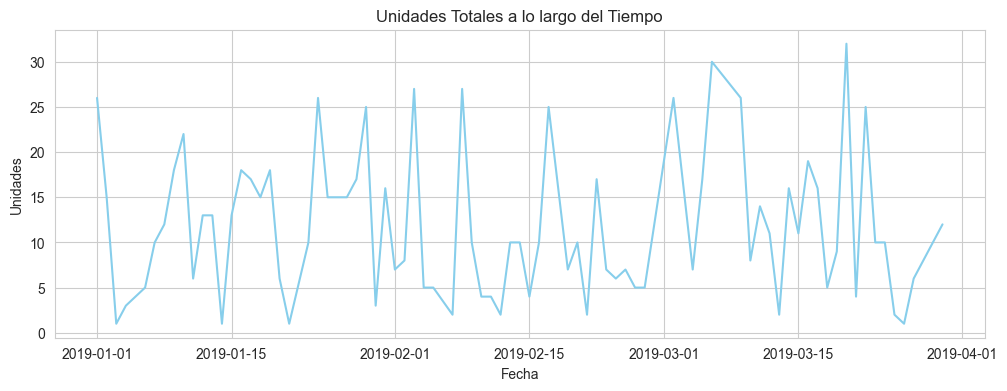

In [4]:
# seleccionar conjunto de datos
df_new1 = df_plots.loc[lambda x: (x['Product'] == 'Sports and travel')] 

# Crear el gráfico de línea
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.lineplot(
    data = df_new1,
    x='Date', 
    y='Quantity', 
    color = 'skyblue'
)

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.title('Unidades Totales a lo largo del Tiempo')

# Mostrar el gráfico
plt.show()

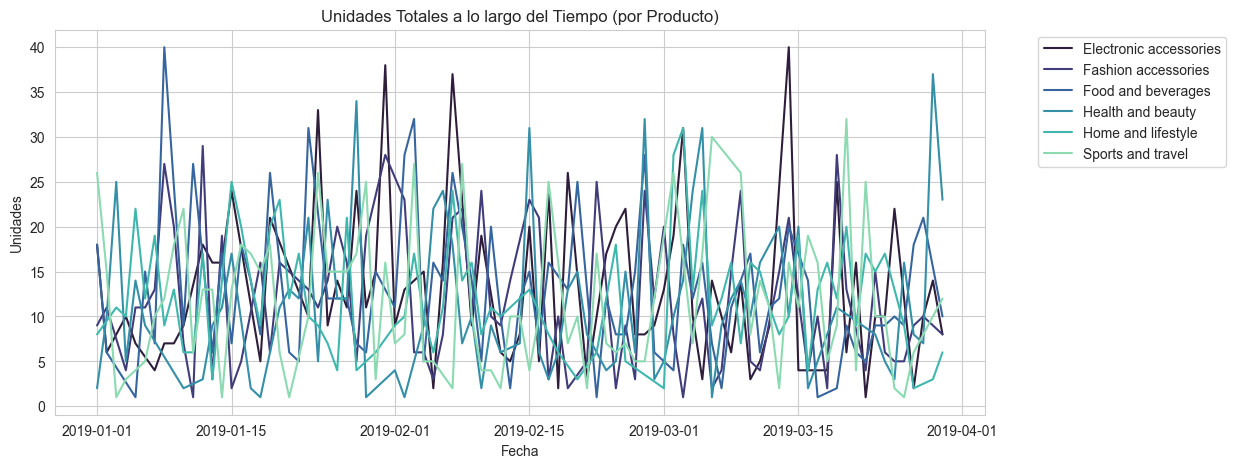

In [5]:
# seleccionar conjunto de datos
df_new2 = df_plots.copy()

# Crear el gráfico de línea
plt.figure(figsize=(12, 5))  # Definir el tamaño de la figura
sns.lineplot(
    data = df_new2,
    x='Date', 
    y='Quantity',
    hue='Product',
    palette = "mako"
)

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.title('Unidades Totales a lo largo del Tiempo (por Producto)')

# Mover la leyenda fuera del gráfico y colocarla a la derecha
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

### Gráficos de Dispersión

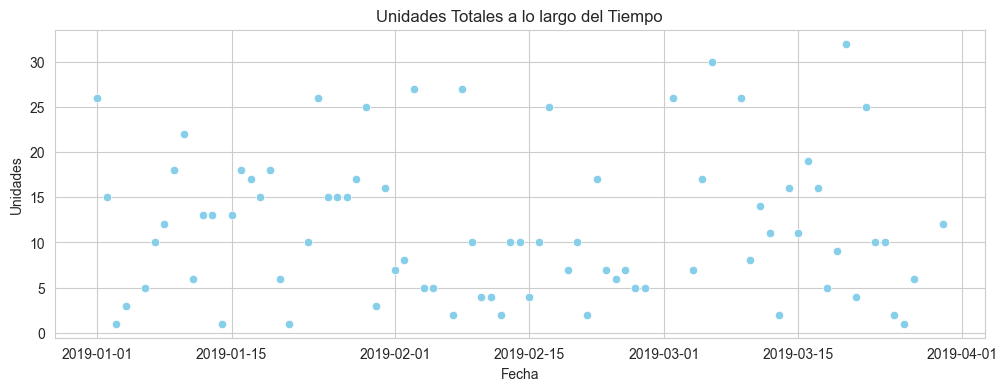

In [6]:
# Crear el gráfico de línea
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.scatterplot(
    data = df_new1,
    x='Date', 
    y='Quantity', 
    color = 'skyblue'
)

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.title('Unidades Totales a lo largo del Tiempo')

# Mostrar el gráfico
plt.show()

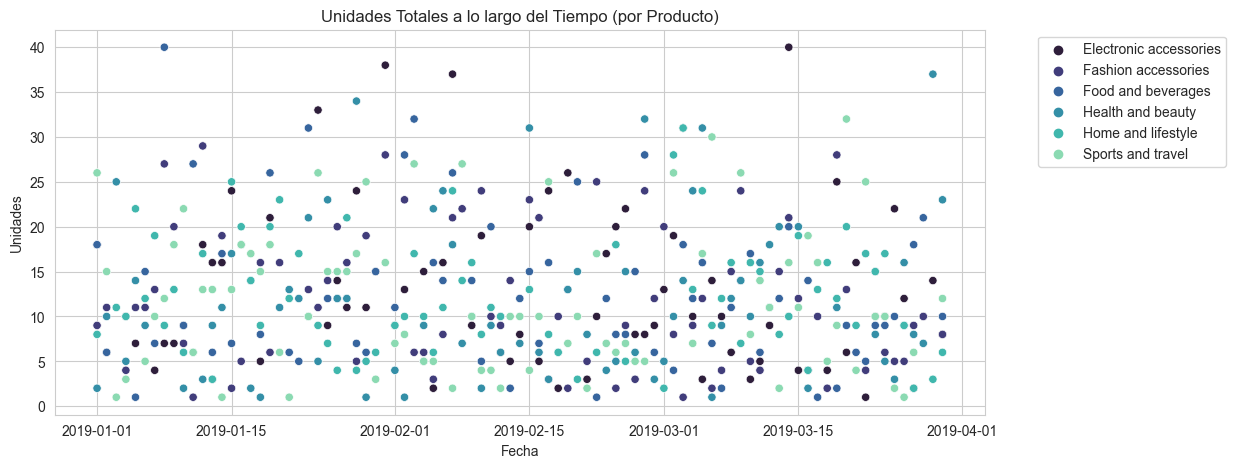

In [7]:
# Crear el gráfico de línea
plt.figure(figsize=(12, 5))  # Definir el tamaño de la figura
sns.scatterplot(
    data = df_new2,
    x='Date', 
    y='Quantity',
    hue='Product',
    palette = "mako"
)

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.title('Unidades Totales a lo largo del Tiempo (por Producto)')

# Mover la leyenda fuera del gráfico y colocarla a la derecha
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

###  Gráfico de Barras


In [8]:
# seleccionar conjunto de datos
df_plots['year'] = df_plots['Date'].dt.year
df_plots['month'] = df_plots['Date'].dt.month
df_plots['day'] =df_plots['Date'].dt.day

# seleccionar conjunto de datos
df_bar = df_plots.groupby(['month','Product'])['Quantity'].sum().reset_index()

df_bar.head()

,month,Product,Quantity
0,1,Electronic accessories,333
1,1,Fashion accessories,336
2,1,Food and beverages,325
3,1,Health and beauty,254
4,1,Home and lifestyle,342


In [9]:
# seleccionar conjunto de datos
df_new1 = df_bar.loc[lambda x: (x['Product'] == 'Sports and travel')] 
df_new2 = df_bar.copy()

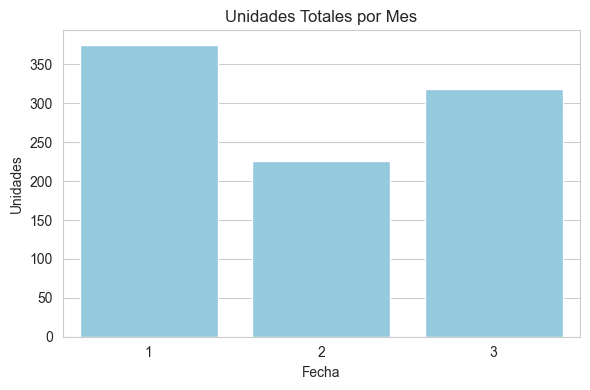

In [10]:
# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x='month', y='Quantity', data=df_new1, color = 'skyblue')

# Añadir título y etiquetas de los ejes
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.title('Unidades Totales por Mes')

# Rotar los ticks del eje x para mejorar la legibilidad
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

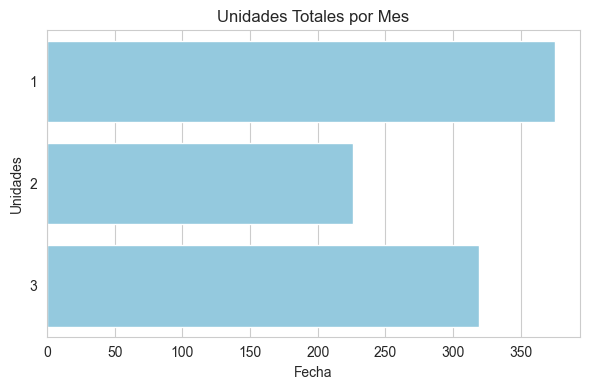

In [11]:
# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x='Quantity', y='month', data=df_new1, color = 'skyblue',orient='h')

# Añadir título y etiquetas de los ejes
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.title('Unidades Totales por Mes')


# Rotar los ticks del eje x para mejorar la legibilidad
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

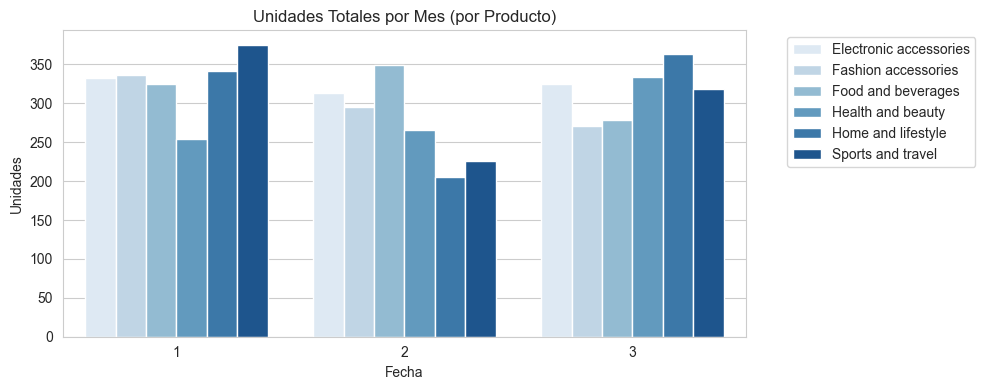

In [12]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 4))
sns.barplot(x='month', y='Quantity', data=df_new2, hue = 'Product', palette = "Blues")

# Añadir título y etiquetas de los ejes
plt.title('Unidades Totales por Mes (por Producto)')
plt.xlabel('Fecha')
plt.ylabel('Unidades')

# Rotar los ticks del eje x para mejorar la legibilidad
plt.xticks(rotation=0)

# Mover la leyenda fuera del gráfico y colocarla a la derecha
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

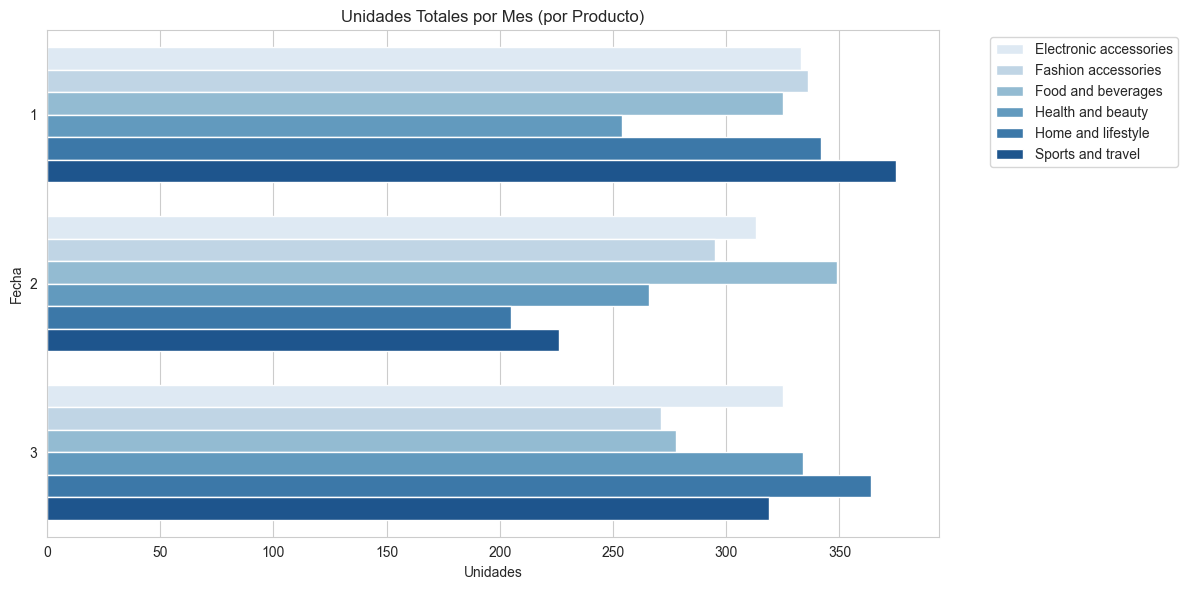

In [13]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='month', data=df_new2, hue = 'Product', palette = "Blues", orient = 'h')

# Añadir título y etiquetas de los ejes
plt.title('Unidades Totales por Mes (por Producto)')
plt.xlabel('Unidades')
plt.ylabel('Fecha')

# Rotar los ticks del eje x para mejorar la legibilidad
plt.xticks(rotation=0)

# Mover la leyenda fuera del gráfico y colocarla a la derecha
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Gráfico: Histograma


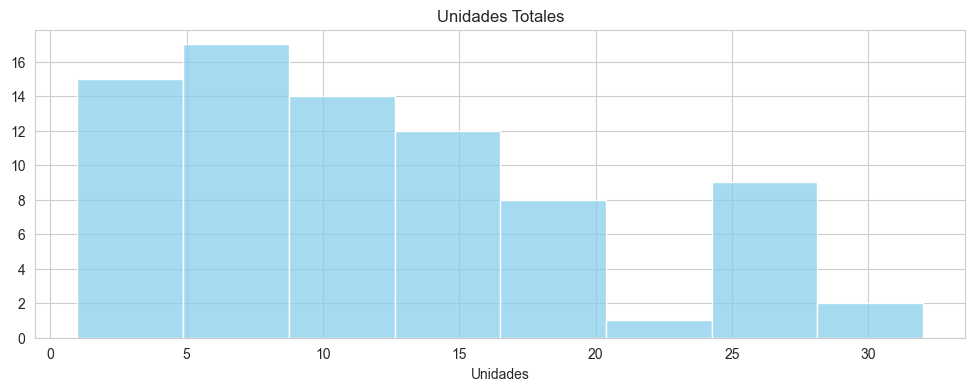

In [14]:
# seleccionar conjunto de datos
df_new1 = df_plots.loc[lambda x: (x['Product'] == 'Sports and travel')] 

# Crear el gráfico de línea
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.histplot(
    data = df_new1,
    x='Quantity', 
    color = 'skyblue'
)

# Personalizar el gráfico
plt.xlabel('Unidades')
plt.ylabel('')
plt.title('Unidades Totales')

# Mostrar el gráfico
plt.show()

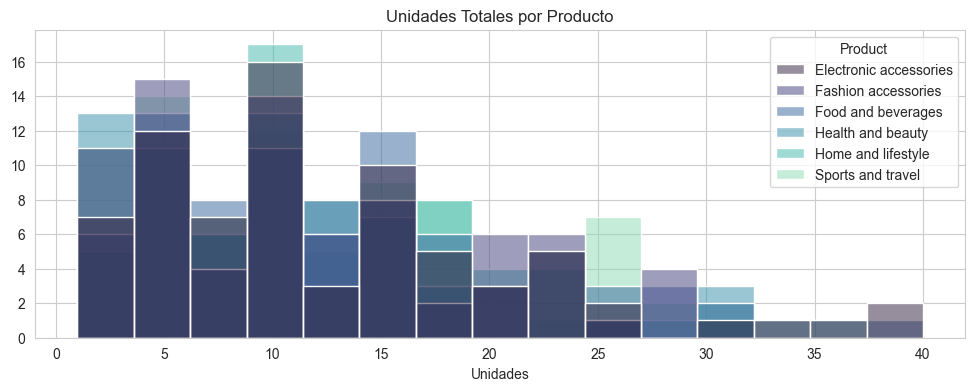

In [15]:
# seleccionar conjunto de datos
df_new2 = df_plots.copy()

# Crear el gráfico de línea
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.histplot(
    data = df_new2,
    x='Quantity', 
    color = 'skyblue',
    hue='Product',
    palette = "mako"
)

# Personalizar el gráfico
plt.xlabel('Unidades')
plt.ylabel('')
plt.title('Unidades Totales por Producto')

# Mostrar el gráfico
plt.show()

### Gráfico: Heatmap


In [16]:
# seleccionar conjunto de datos
pivot_df = df_plots.pivot(
    index='Date',
    columns='Product',
    values='Quantity'
    ).fillna(0).reset_index()

pivot_df.head()

Product,Date,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,2019-01-01,18.0,9.0,18.0,2.0,8.0,26.0
1,2019-01-02,6.0,11.0,6.0,10.0,0.0,15.0
2,2019-01-03,0.0,0.0,0.0,25.0,11.0,1.0
3,2019-01-04,10.0,4.0,0.0,5.0,10.0,3.0
4,2019-01-05,7.0,11.0,1.0,14.0,22.0,0.0


In [17]:
# Calcular la matriz de correlación
df_new = pivot_df.drop(['Date'],axis =1).dropna()
correlation_matrix = df_new.corr()
correlation_matrix

Product,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Product,,,,,,
Electronic accessories,1.000000,0.205911,0.019437,0.062587,-0.003436,0.066047
Fashion accessories,0.205911,1.000000,0.030850,-0.035541,-0.033227,0.144063
Food and beverages,0.019437,0.030850,1.000000,0.058185,-0.016639,0.017786
Health and beauty,0.062587,-0.035541,0.058185,1.000000,0.048463,-0.287534
Home and lifestyle,-0.003436,-0.033227,-0.016639,0.048463,1.000000,0.152806
Sports and travel,0.066047,0.144063,0.017786,-0.287534,0.152806,1.000000


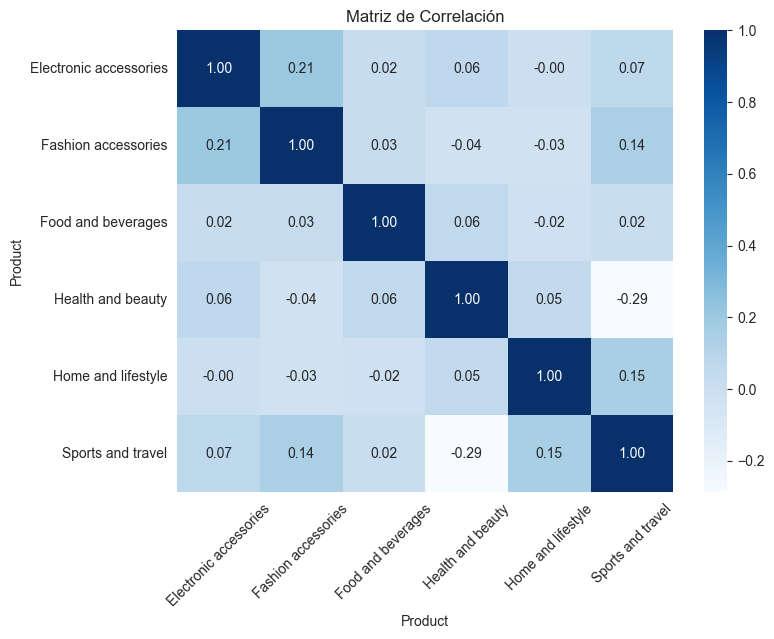

In [18]:
# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")

# Añadir título
plt.title('Matriz de Correlación')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el heatmap
plt.show()

### Gráfico: Boxplot


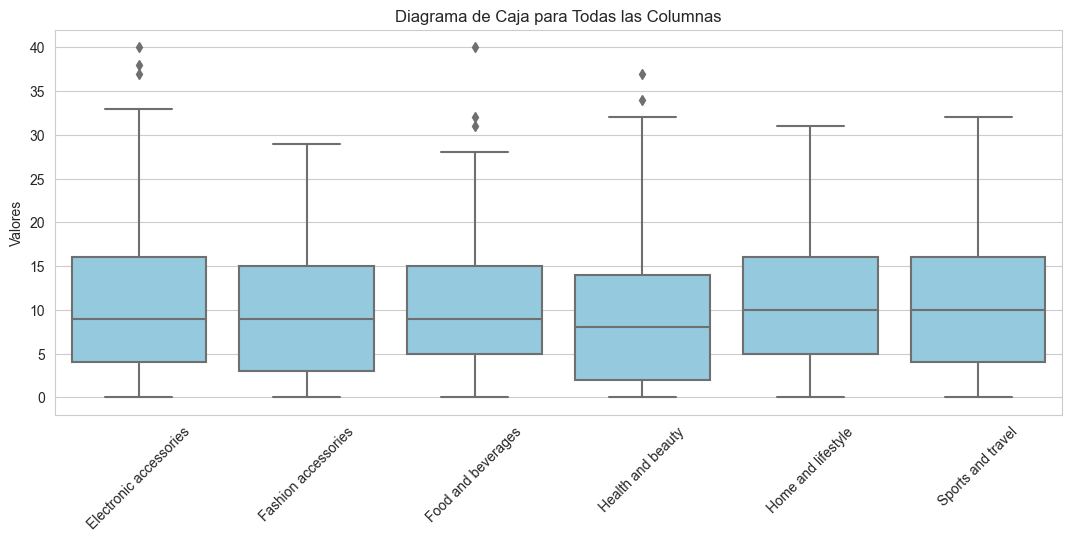

In [19]:
# Crear el gráfico de diagrama de caja
plt.figure(figsize=(13, 5))  # Definir el tamaño de la figura
sns.boxplot(data=df_new, color='skyblue')

# Personalizar el gráfico
plt.xlabel('')
plt.ylabel('Valores')
plt.title('Diagrama de Caja para Todas las Columnas')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

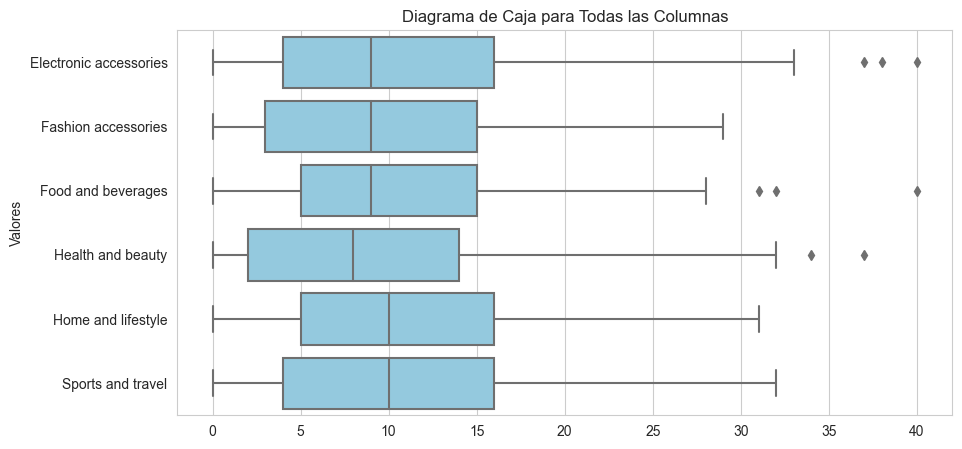

In [20]:
# Crear el gráfico de diagrama de caja
plt.figure(figsize=(10, 5))  # Definir el tamaño de la figura
sns.boxplot(data=df_new, color='skyblue',orient='h')

# Personalizar el gráfico
plt.xlabel('')
plt.ylabel('Valores')
plt.title('Diagrama de Caja para Todas las Columnas')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()